In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [3]:
from google.colab import drive;
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [4]:
data=pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv');
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [5]:
rows, columns = data.shape
print("the data set has rows of",rows);
print("The data set has columns of",columns);

the data set has rows of 143
The data set has columns of 9


In [6]:
print("Columns and their data types: \n");
print(data.dtypes);

Columns and their data types: 

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [7]:
mean_score = data['score'].mean()
print("Mean of the score:", mean_score)
median_score = data['score'].median()
print("Median of the score:", median_score)
std_score = data['score'].std()
print("Standard deviation of the score:", std_score)

Mean of the score: 5.52758041958042
Median of the score: 5.785
Standard deviation of the score: 1.1707165099442995


In [8]:
highest_happiness = data.loc[data['score'].idxmax()]
lowest_happiness = data.loc[data['score'].idxmin()]
print("Country with the highest happiness score:")
print(highest_happiness[['Country name', 'score']])
print("\nCountry with the lowest happiness score:")
print(lowest_happiness[['Country name', 'score']])

Country with the highest happiness score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the lowest happiness score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [9]:
missing_value = data.isnull().sum()
print("Total count of missing values in each column:")
print(missing_value)

Total count of missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [10]:
filtered_data = data[data['score']>7.5]
print("Countries with a score greater than 7.5:")
print(filtered_data[['Country name','score']])
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries with the highest GDP per capita:")
print(sorted_data.head(10))

Countries with a score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525

Top 10 countries with the highest GDP per capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [11]:
def category(score):
  if score<4:
    return 'Low'
  elif 4<= score <=6:
    return 'Medium'
  else:
    return 'High'
data['Happiness Category'] = data['score'].apply(category)
print(data[['Country name', 'score', 'Happiness Category']].head())

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

Text(0, 0.5, 'Score')

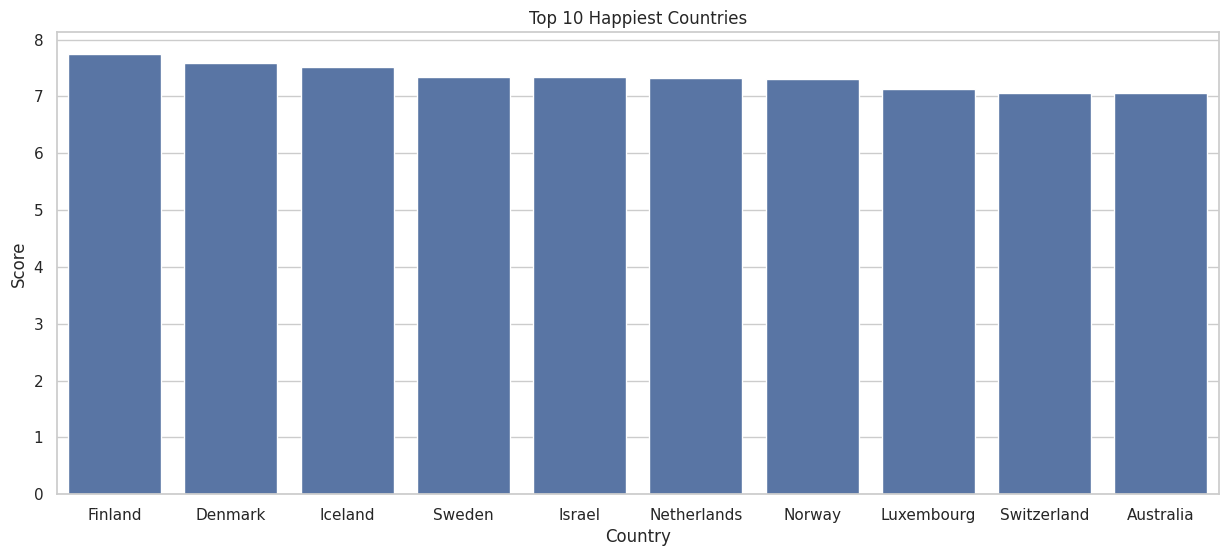

In [12]:
sns.set(style = "whitegrid");
happiest_10 = data.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(15,6))
sns.barplot(x='Country name', y='score', data=happiest_10)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

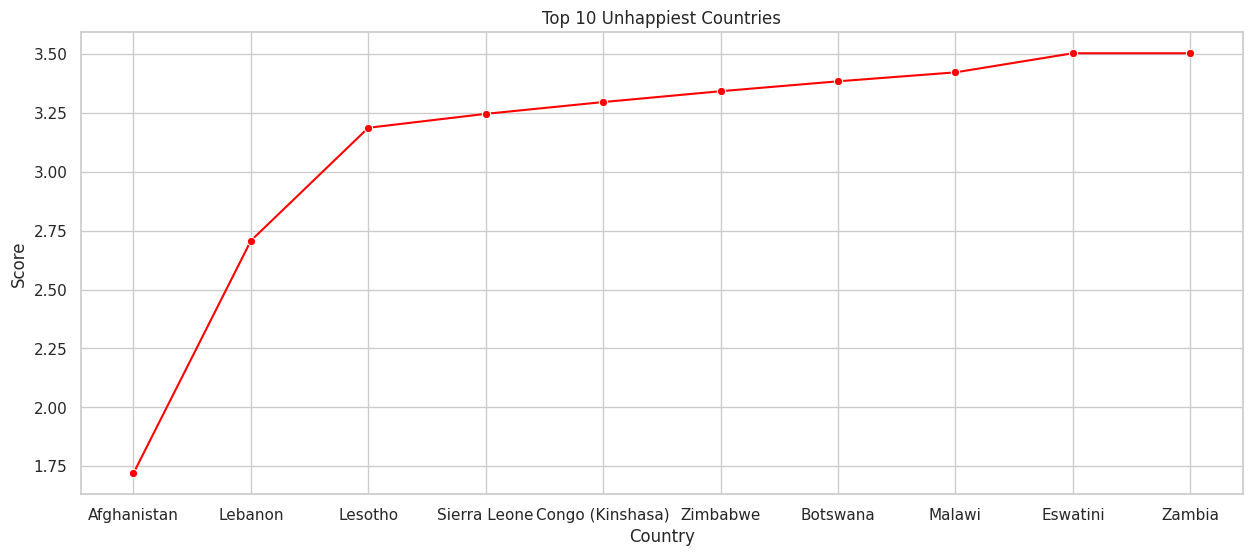

In [13]:
unhappiest_10 = data.sort_values(by='score', ascending=True).head(10);
plt.figure(figsize=(15,6))
sns.lineplot(x='Country name', y='score', data=unhappiest_10, color='red', marker='o')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Score')

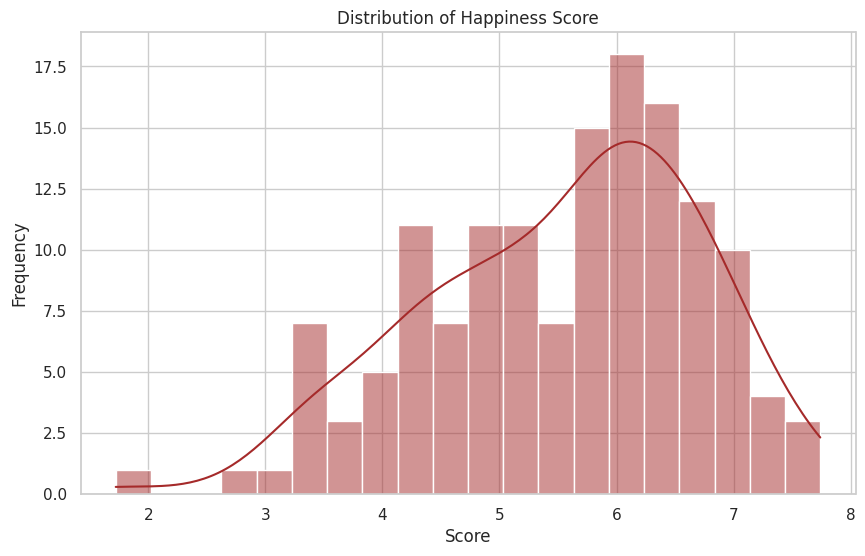

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='brown')
plt.title('Distribution of Happiness Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


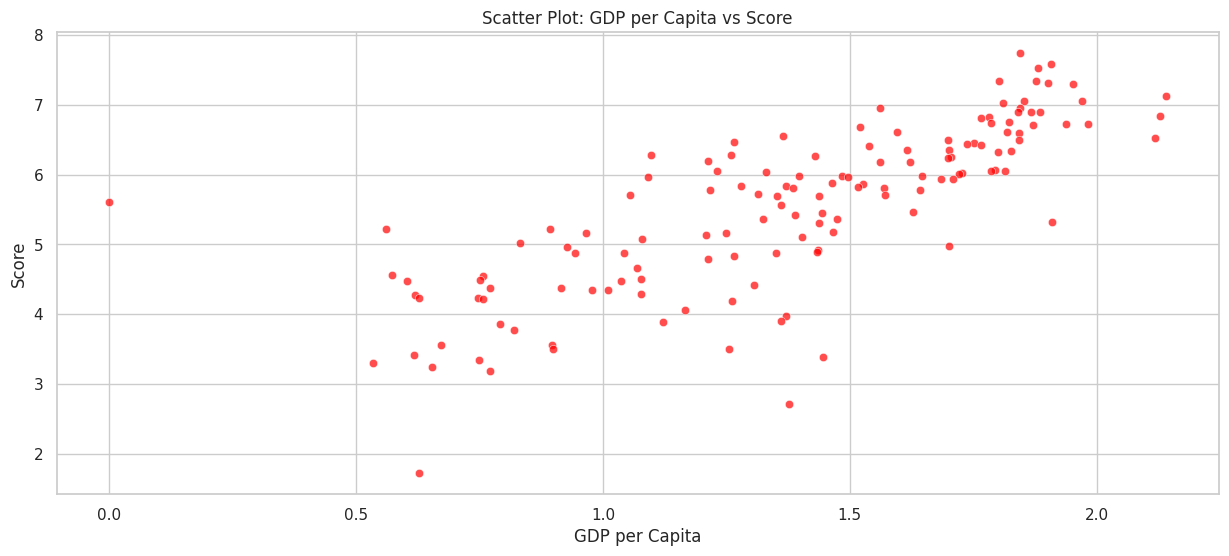

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='red', alpha=0.7)
plt.title('Scatter Plot: GDP per Capita vs Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_countries =["Afghanistan", "Bangladesh", "Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
filtered_data= data[data['Country name'].isin(south_asian_countries)]
print(filtered_data[['Country name','score']])
filtered_data.to_csv('South_asian_countries.csv', index=False)

    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
127    Sri Lanka  3.898
128   Bangladesh  3.886
142  Afghanistan  1.721


Task - 2 - Composite Score Ranking:
Tasks:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [ ]:
data2= pd.read_csv('/content/South_asian_countries.csv');
data2.head()
data2['Composite Score'] = 0.40 * data2['Log GDP per capita'] + 0.30 * data2['Social support'] + 0.30 * data2['Healthy life expectancy']
print(data2[['Country name', 'score', 'Composite Score']])

  Country name  score  Composite Score
0        Nepal  5.158           0.8159
1     Pakistan  4.657           0.7039
2        India  4.054           0.7874
3    Sri Lanka  3.898           1.0739
4   Bangladesh  3.886           0.6774
5  Afghanistan  1.721           0.3238


In [ ]:
ranking= data2.sort_values(by='Composite Score', ascending=False)
print(ranking[['Country name', 'score', 'Composite Score']])

  Country name  score  Composite Score
3    Sri Lanka  3.898           1.0739
0        Nepal  5.158           0.8159
2        India  4.054           0.7874
1     Pakistan  4.657           0.7039
4   Bangladesh  3.886           0.6774
5  Afghanistan  1.721           0.3238


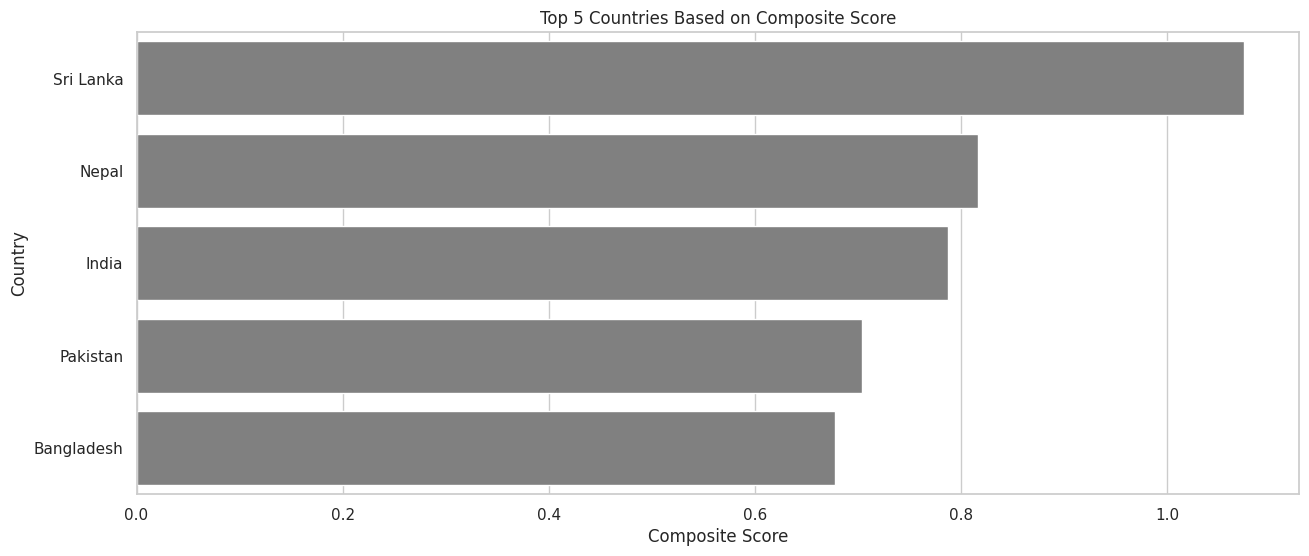

In [ ]:
composite_5= ranking.head(5)
plt.figure(figsize=(15, 6))
sns.barplot(x='Composite Score', y='Country name', data=composite_5,color='grey')
plt.title('Top 5 Countries Based on Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show();

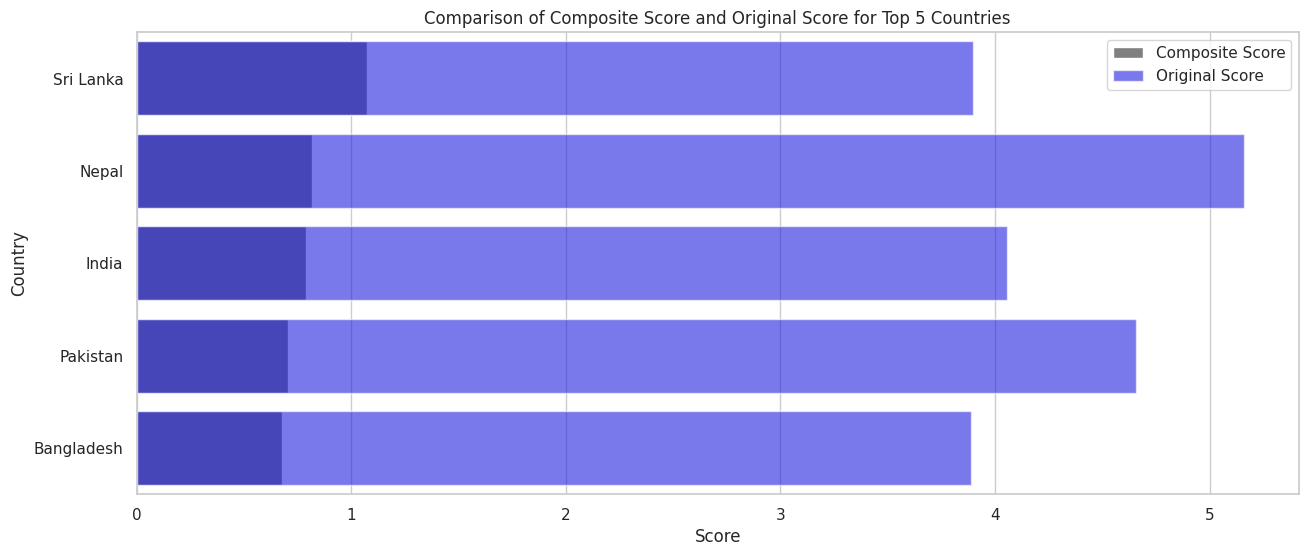

In [ ]:
# Top 5 countries based on Composite Score
top_5 = ranking.head(5)

# Create a plot comparing 'score' and 'Composite Score'
plt.figure(figsize=(15, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5, color='grey', label='Composite Score')
sns.barplot(x='score', y='Country name', data=top_5, color='blue', alpha=0.6, label='Original Score')

plt.title('Comparison of Composite Score and Original Score for Top 5 Countries')
plt.xlabel('Score')
plt.ylabel('Country')
plt.legend()
plt.show()


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

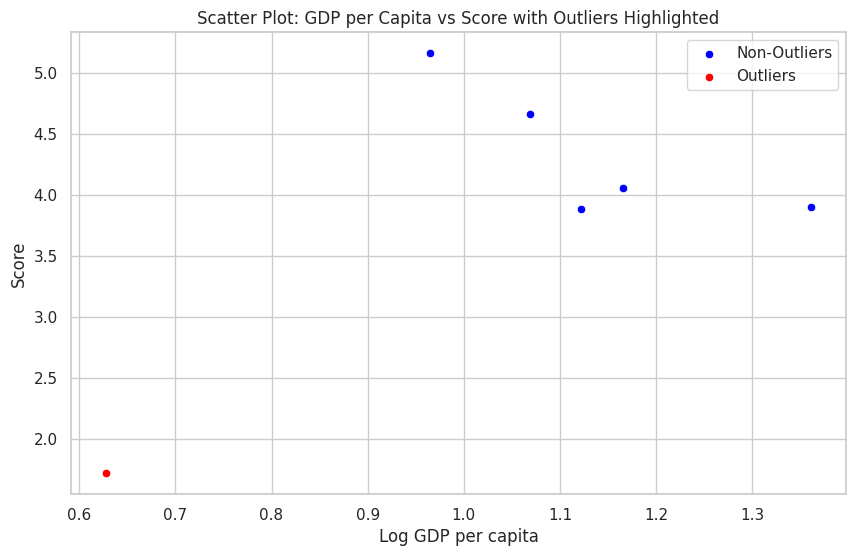

In [ ]:
# Task - 3 - Outlier Detection

# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
Q1_score = data2['score'].quantile(0.25)
Q3_score = data2['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = data2['Log GDP per capita'].quantile(0.25)
Q3_gdp = data2['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# 2. Define outliers using the 1.5 × IQR rule
score_outliers = data2[(data2['score'] < (Q1_score - 1.5 * IQR_score)) |
                       (data2['score'] > (Q3_score + 1.5 * IQR_score))]

gdp_outliers = data2[(data2['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) |
                     (data2['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]

outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data2, color='blue', label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Scatter Plot: GDP per Capita vs Score with Outliers Highlighted')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.show()


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [ ]:
# Calculate Pearson correlation
freedom_corr = data2['Freedom to make life choices'].corr(data2['score'])
generosity_corr = data2['Generosity'].corr(data2['score'])

print(f"Pearson Correlation - Freedom to Make Life Choices vs Score: {freedom_corr:.2f}")
print(f"Pearson Correlation - Generosity vs Score: {generosity_corr:.2f}")


Pearson Correlation - Freedom to Make Life Choices vs Score: 0.80
Pearson Correlation - Generosity vs Score: 0.87


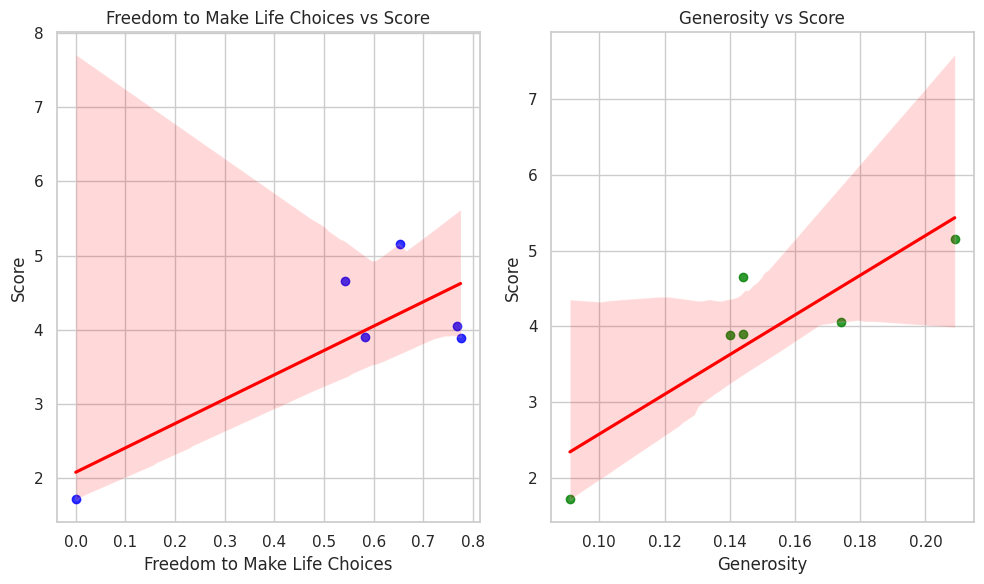

In [ ]:
# Scatter plot for 'Freedom to Make Life Choices' vs 'Score'
plt.figure(figsize=(10, 6))

# Plot 1: Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.regplot(
    x='Freedom to make life choices', y='score', data=data2,
    scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}
)
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

# Plot 2: Generosity
plt.subplot(1, 2, 2)
sns.regplot(
    x='Generosity', y='score', data=data2,
    scatter_kws={'color': 'green'}, line_kws={'color': 'red'}
)
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

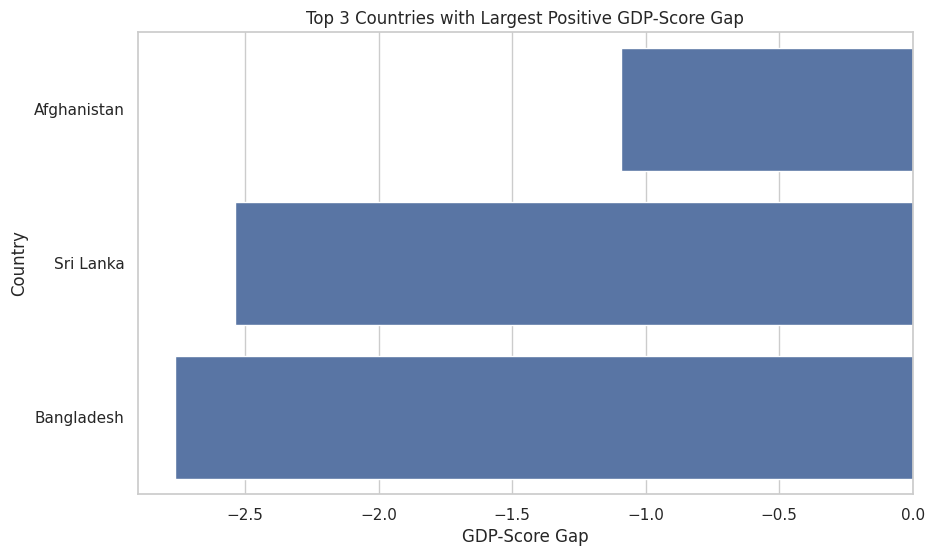

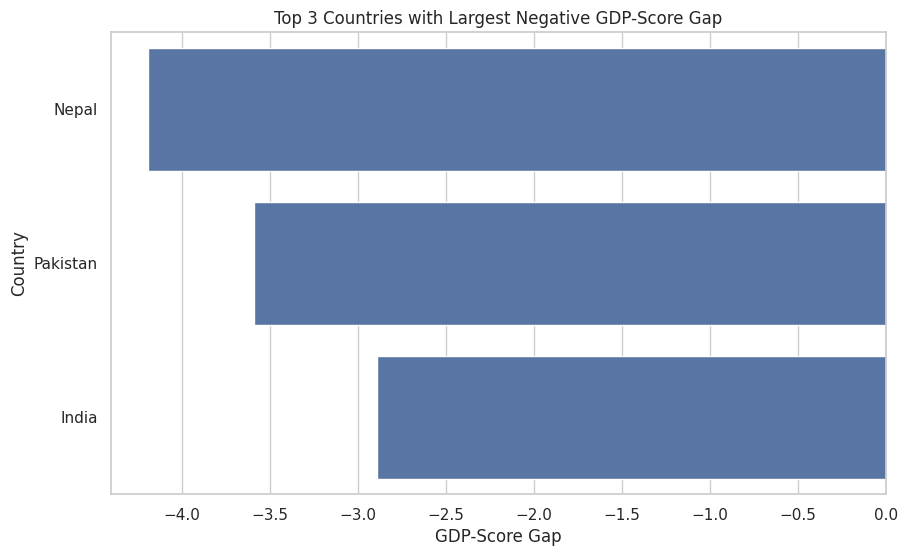

In [ ]:
# Task - 5 - Gap Analysis

# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
data2['GDP-Score Gap'] = data2['Log GDP per capita'] - data2['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
# Ascending order
ascending_gap = data2[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)

# Descending order
descending_gap = data2[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)

# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

Complete the following task:

In [ ]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

middle_east_df = data[data['Country name'].isin(middle_east_countries)]

middle_east_df.to_csv("middle_east_data.csv", index=False)

print(middle_east_df.head())

            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual Happiness Category  
4                       0.193                2.298            

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?


In [ ]:
# 1. Descriptive Statistics:

# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
south_asia_mean = data2['score'].mean()
south_asia_std = data2['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

# • Which region has higher happiness Scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

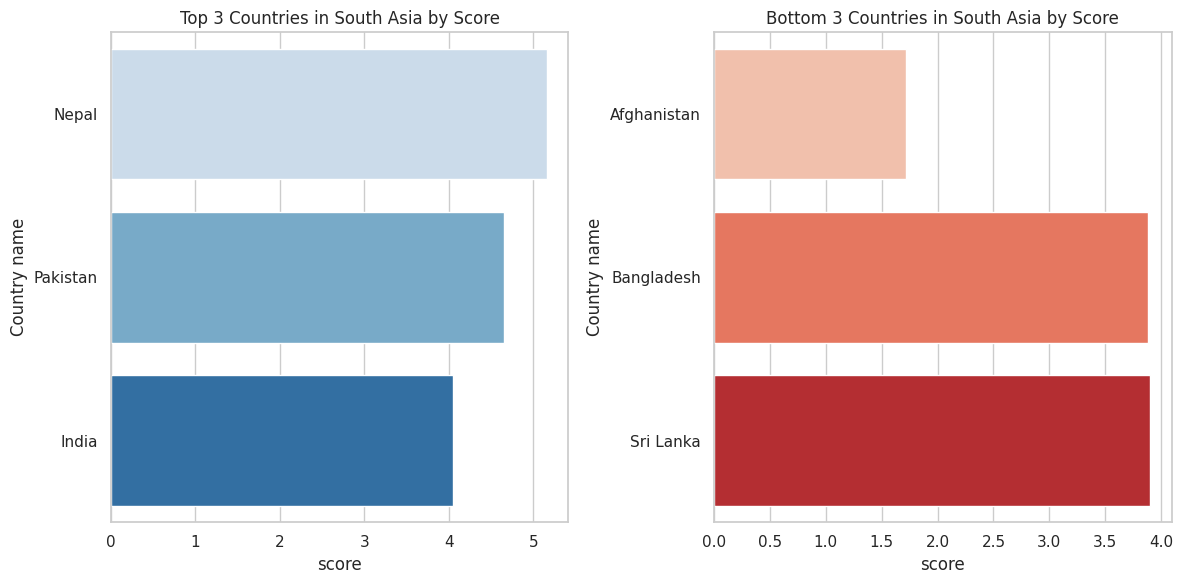

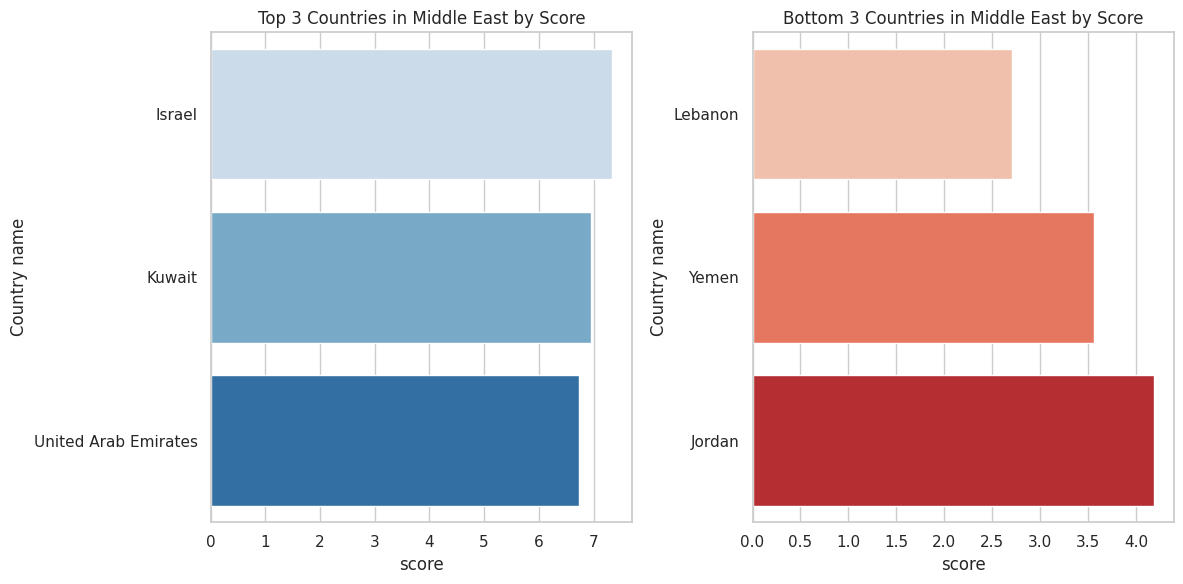

In [ ]:
# 2. Top and Bottom Performers:

# • Identify the top 3 and bottom 3 countries in each region based on the score.
south_asia_top_3 = data2[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
south_asia_bottom_3 = data2[['Country name', 'score']].sort_values(by='score').head(3)

middle_east_top_3 = middle_east_df[['Country name', 'score']].sort_values(by='score', ascending=False).head(3)
middle_east_bottom_3 = middle_east_df[['Country name', 'score']].sort_values(by='score').head(3)

# • Plot bar charts comparing these charts.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=south_asia_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in South Asia by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=south_asia_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in South Asia by Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=middle_east_top_3, hue='Country name', palette='Blues', legend=False)
plt.title('Top 3 Countries in Middle East by Score')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=middle_east_bottom_3, hue='Country name', palette='Reds', legend=False)
plt.title('Bottom 3 Countries in Middle East by Score')

plt.tight_layout()
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

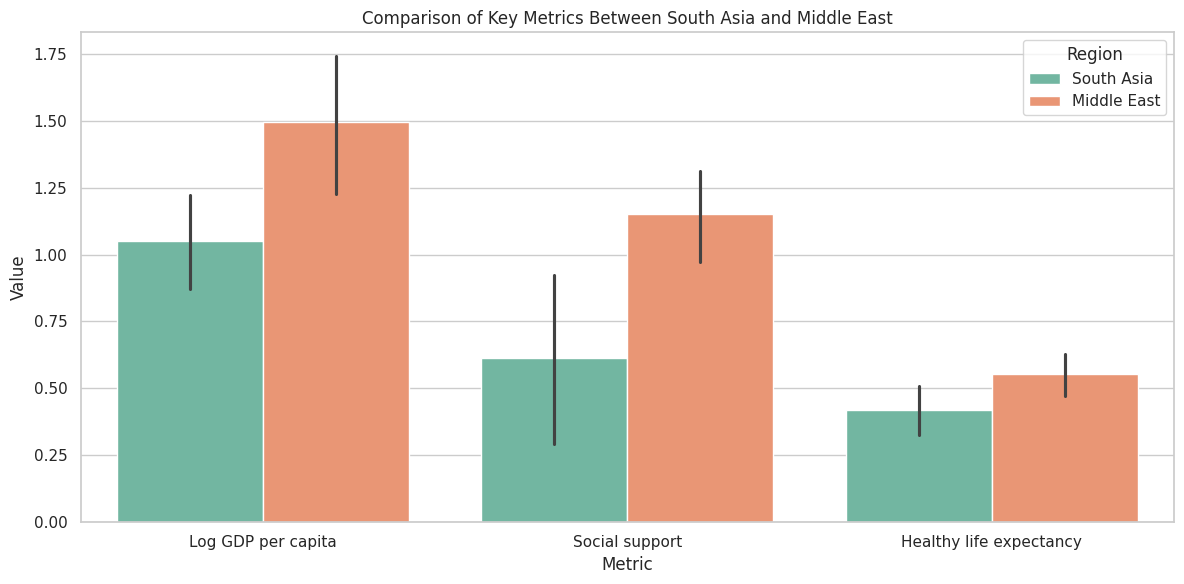

In [ ]:
# 3. Metric Comparisons:

# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = data2[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
middle_east_metrics = middle_east_df[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

comparison_df = pd.concat([south_asia_metrics, middle_east_metrics]).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='Set2')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
# 4. Happiness Disparity:

# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
south_asia_score_range = data2['score'].max() - data2['score'].min()
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = data2['score'].std() / data2['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia Score Range: {south_asia_score_range}")
print(f"Middle East Score Range: {middle_east_score_range}")
print(f"South Asia Coefficient of Variation (CV): {south_asia_cv}")
print(f"Middle East Coefficient of Variation (CV): {middle_east_cv}")

South Asia Score Range: 3.4370000000000003
Middle East Score Range: 4.634
South Asia Coefficient of Variation (CV): 0.3021482883337427
Middle East Coefficient of Variation (CV): 0.28938880812119405


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


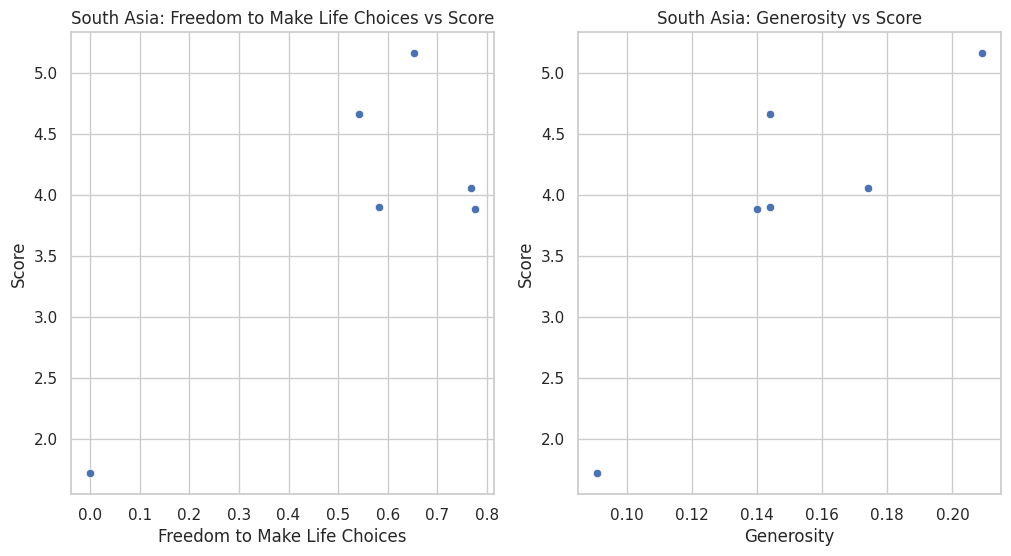

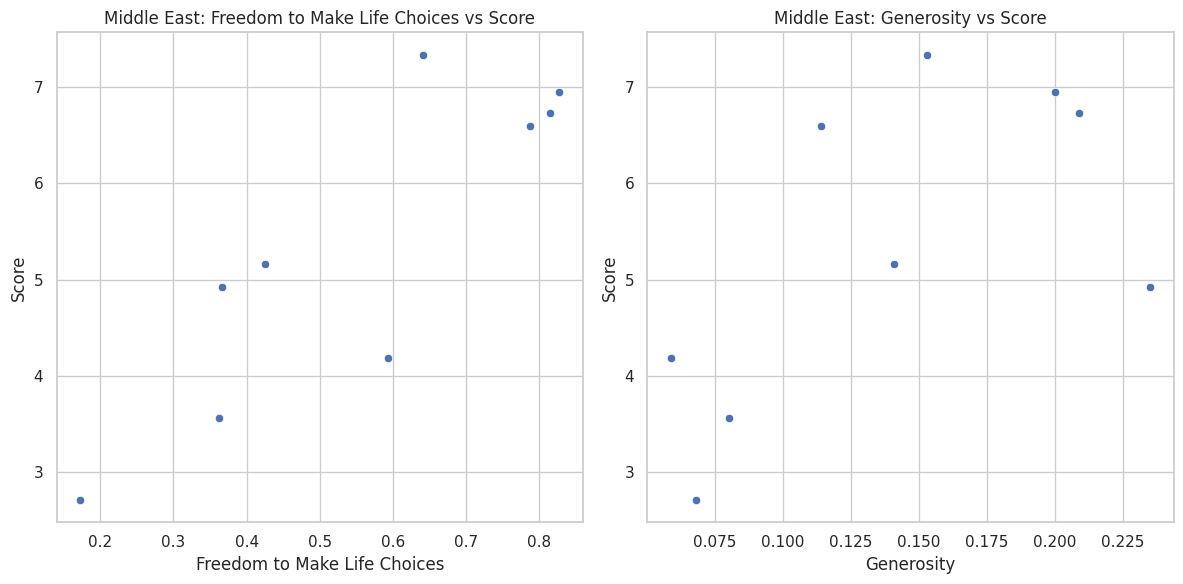

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
south_asia_corr = data2[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlation Matrix:")
print(south_asia_corr)
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)

# Create scatter plots to visualize and interpret the relationships.
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=data2)
plt.title('South Asia: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=data2)
plt.title('South Asia: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

# Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df)
plt.title('Middle East: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=middle_east_df)
plt.title('Middle East: Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

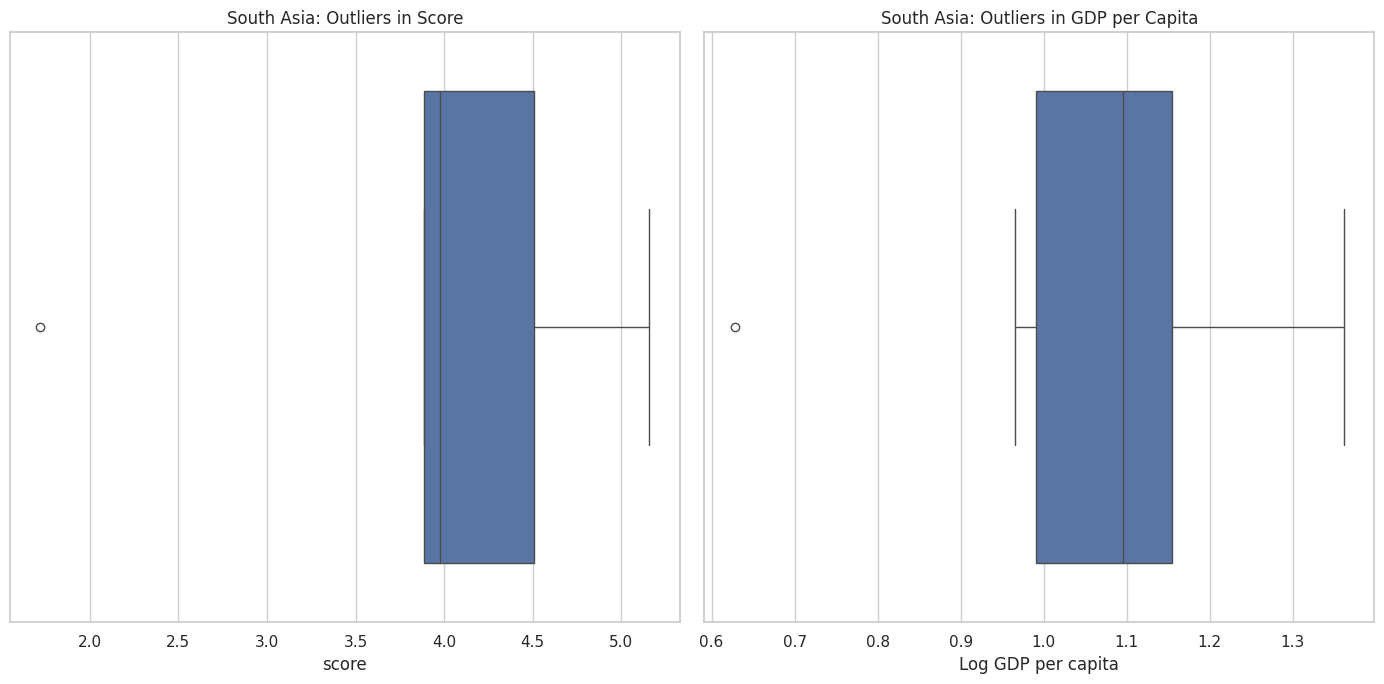

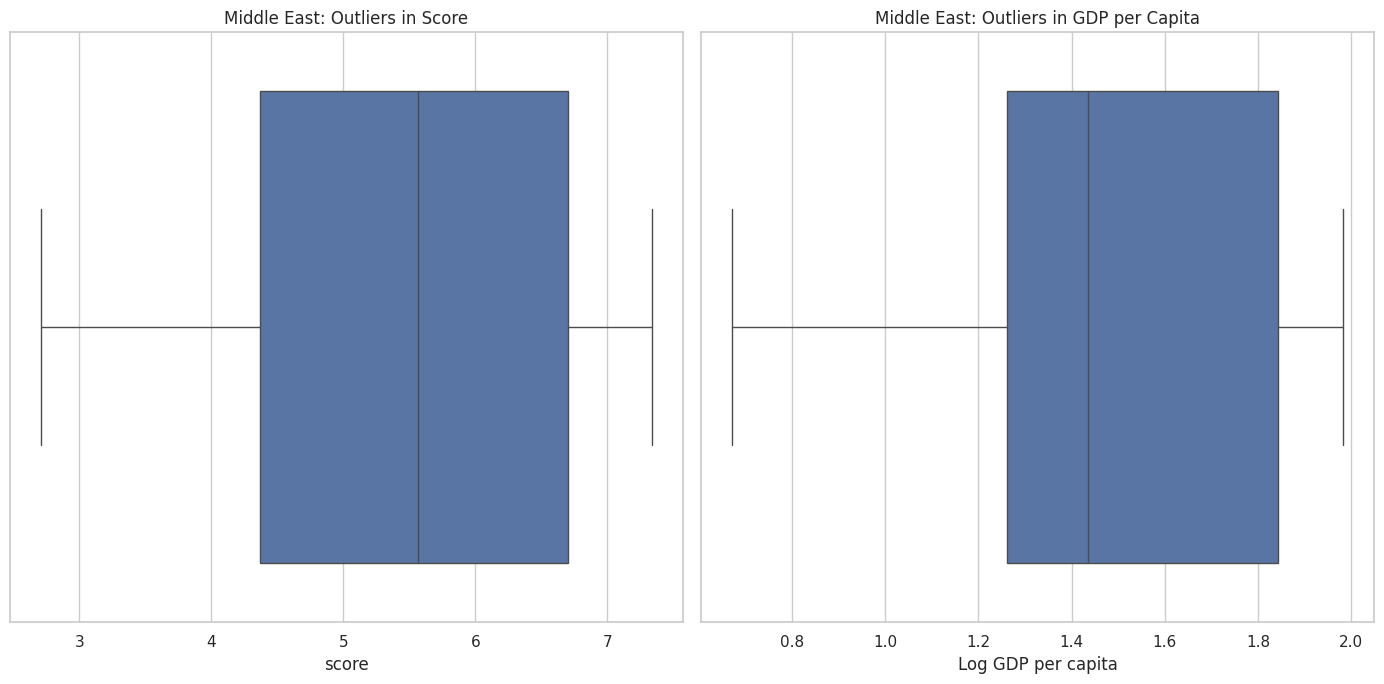

South Asia Outliers in Score:
  Country name  score
5  Afghanistan  1.721

South Asia Outliers in GDP per Capita:
  Country name  Log GDP per capita
5  Afghanistan               0.628

Middle East Outliers in Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East Outliers in GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Detection

# South Asia: Outliers based on Score and GDP per Capita
south_asia_outliers_score = data2[(data2['score'] < data2['score'].quantile(0.25) - 1.5 * (data2['score'].quantile(0.75) - data2['score'].quantile(0.25))) |
                                  (data2['score'] > data2['score'].quantile(0.75) + 1.5 * (data2['score'].quantile(0.75) - data2['score'].quantile(0.25)))]

south_asia_outliers_gdp = data2[(data2['Log GDP per capita'] < data2['Log GDP per capita'].quantile(0.25) - 1.5 * (data2['Log GDP per capita'].quantile(0.75) - data2['Log GDP per capita'].quantile(0.25))) |
                                 (data2['Log GDP per capita'] > data2['Log GDP per capita'].quantile(0.75) + 1.5 * (data2['Log GDP per capita'].quantile(0.75) - data2['Log GDP per capita'].quantile(0.25)))]

# Middle East: Outliers based on Score and GDP per Capita
middle_east_outliers_score = middle_east_df[(middle_east_df['score'] < middle_east_df['score'].quantile(0.25) - 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25))) |
                                             (middle_east_df['score'] > middle_east_df['score'].quantile(0.75) + 1.5 * (middle_east_df['score'].quantile(0.75) - middle_east_df['score'].quantile(0.25)))]

middle_east_outliers_gdp = middle_east_df[(middle_east_df['Log GDP per capita'] < middle_east_df['Log GDP per capita'].quantile(0.25) - 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25))) |
                                           (middle_east_df['Log GDP per capita'] > middle_east_df['Log GDP per capita'].quantile(0.75) + 1.5 * (middle_east_df['Log GDP per capita'].quantile(0.75) - middle_east_df['Log GDP per capita'].quantile(0.25)))]

# Plotting outliers
plt.figure(figsize=(14, 7))

# South Asia
plt.subplot(1, 2, 1)
sns.boxplot(x=data2['score'])
plt.title('South Asia: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=data2['Log GDP per capita'])
plt.title('South Asia: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

# Middle East
plt.subplot(1, 2, 1)
sns.boxplot(x=middle_east_df['score'])
plt.title('Middle East: Outliers in Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=middle_east_df['Log GDP per capita'])
plt.title('Middle East: Outliers in GDP per Capita')

plt.tight_layout()
plt.show()

# Display outliers for review
print("South Asia Outliers in Score:")
print(south_asia_outliers_score[['Country name', 'score']])
print("\nSouth Asia Outliers in GDP per Capita:")
print(south_asia_outliers_gdp[['Country name', 'Log GDP per capita']])

print("\nMiddle East Outliers in Score:")
print(middle_east_outliers_score[['Country name', 'score']])
print("\nMiddle East Outliers in GDP per Capita:")
print(middle_east_outliers_gdp[['Country name', 'Log GDP per capita']])


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

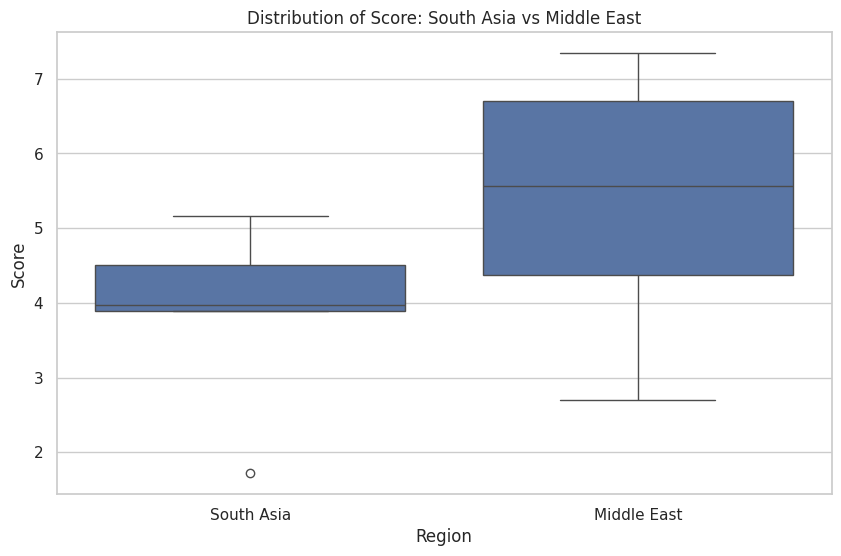

In [ ]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([data2.assign(Region='South Asia'), middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Score: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()